In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_excel("doc.xlsx")

In [3]:
data

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


# EDA

In [4]:
data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [5]:
data.isnull().sum()
# there are null values in 3 columns 

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [6]:
# finding out the data types all are in object and only fees is in integer so we need to change the rest
data.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

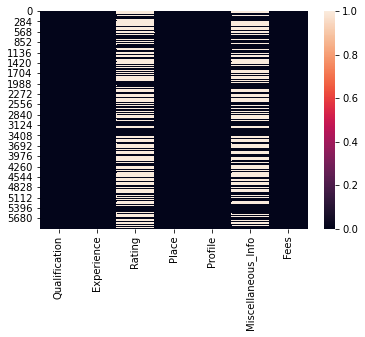

In [8]:
sns.heatmap(data.isnull())
# from this heatmap we can clearly remove the rating and misclennous info as 75% of the data is null values 

In [9]:
data=data.drop(['Rating','Miscellaneous_Info'],axis=1)

In [10]:
data.isnull().sum()

Qualification     0
Experience        0
Place            25
Profile           0
Fees              0
dtype: int64

In [12]:
data['Place'].mode()
data['Place']=data['Place'].replace(np.NaN,'HSR Layout, Bangalore')

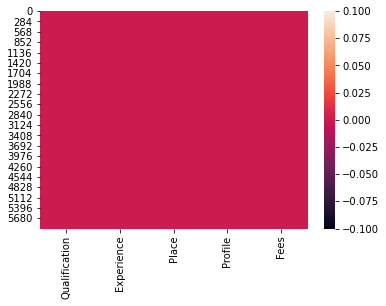

In [13]:
sns.heatmap(data.isnull())
# done with the null values 

In [14]:
# for better understanding
items=['Qualification','Experience','Place','Profile']
for i in items:
    print(data[i].unique())

['BHMS, MD - Homeopathy' 'BAMS, MD - Ayurveda Medicine'
 'MBBS, MS - Otorhinolaryngology' ...
 'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery'
 'BDS, certification in smile designing'
 'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)']
['24 years experience' '12 years experience' '9 years experience'
 '20 years experience' '8 years experience' '42 years experience'
 '10 years experience' '14 years experience' '23 years experience'
 '5 years experience' '7 years experience' '21 years experience'
 '19 years experience' '41 years experience' '31 years experience'
 '25 years experience' '16 years experience' '15 years experience'
 '11 years experience' '22 years experience' '38 years experience'
 '6 years experience' '36 years experience' '13 years experience'
 '18 years experience' '46 years experience' '40 years experience'
 '49 years experience' '33 years experience' '0 years experi

In [15]:
# we need to encode the data using label encoder 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
items=['Qualification','Experience','Place','Profile']
for i in items:
    data[i]=le.fit_transform(data[i])

In [16]:
data.head()

,Qualification,Experience,Place,Profile,Fees
0,401,16,299,5,100
1,73,3,866,0,350
2,1135,63,457,3,300
3,464,3,68,0,250
4,10,12,337,0,250


In [17]:
data.describe()
# other than profile all the columns have more max value than 75% so we have clearly many outliers 
# quali,place,info,fees have more std than others 
# quali has the highest mean value compared to others

,Qualification,Experience,Place,Profile,Fees
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,596.857574,23.010904,414.368059,2.441872,307.944640
std,413.842446,20.937163,258.547684,1.658014,190.920373
min,0.000000,0.000000,0.000000,0.000000,5.000000
25%,219.000000,6.000000,197.000000,1.000000,150.000000
50%,596.000000,15.000000,407.000000,2.000000,300.000000
75%,943.000000,36.000000,628.000000,4.000000,500.000000
max,1419.000000,63.000000,876.000000,5.000000,950.000000


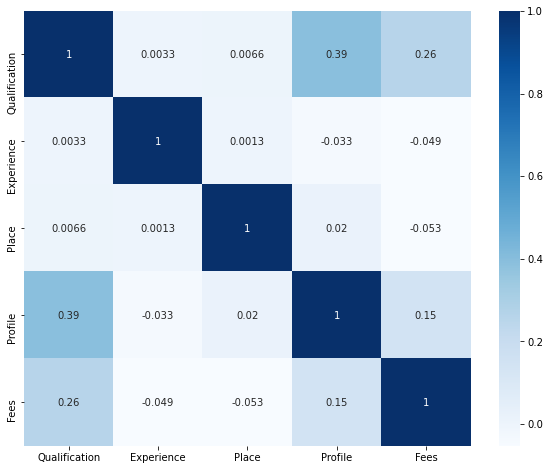

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),cmap='Blues',annot=True)
# out of all profile is correlated with fees 
# qualification is co related with proflie info
# rest all arent co- related most of the columns arent co related 

# Visualizing data

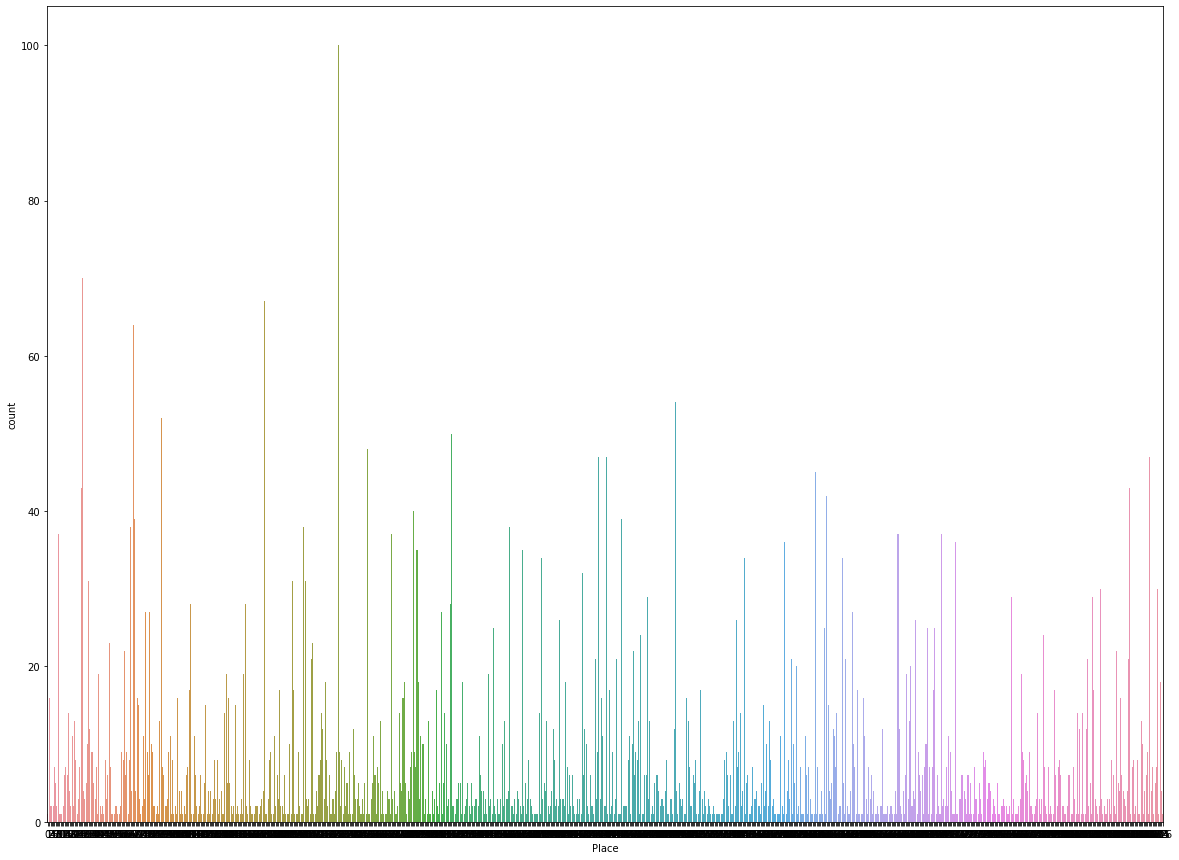

In [19]:
plt.figure(figsize=(20,15))
sns.countplot("Place",data=data)


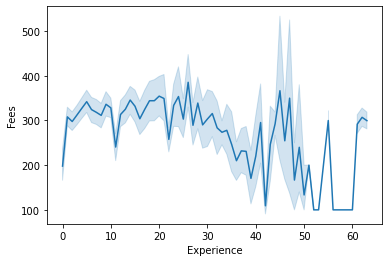

In [20]:
sns.lineplot(x='Experience',y='Fees',data=data)
# from this on an avg 40 to 50 exp people are getting more fees than other people

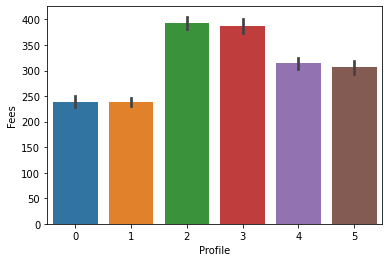

In [21]:
sns.barplot(x='Profile',y='Fees',data=data)
# from this it is clear that profile 2 people are getting paid highest fees and profile 0 and 1 are the least 

In [22]:
# removing for outliers
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_new=data.loc[(z_score<3).all(axis=1)]
print(data_new.shape)

(5961, 5)
(5941, 5)


In [23]:
data_new.skew()

Qualification    0.242035
Experience       0.825063
Place            0.125450
Profile          0.111080
Fees             0.714016
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016BBE0AC5E0>,
      dtype=object)

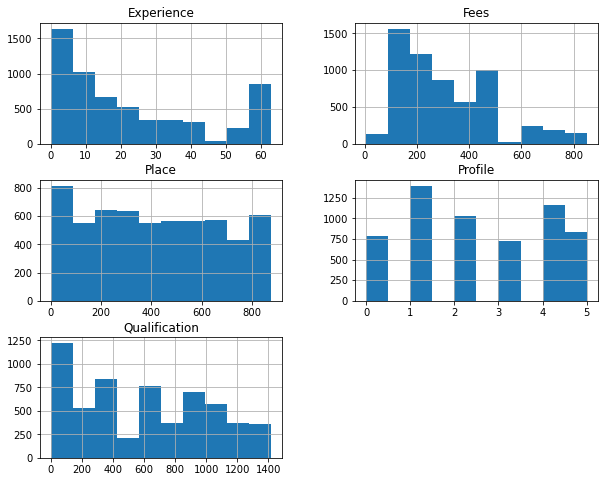

In [24]:
data_new.hist(figsize=(10,8))

In [25]:
data_new.skew()

Qualification    0.242035
Experience       0.825063
Place            0.125450
Profile          0.111080
Fees             0.714016
dtype: float64

In [26]:
data_new

,Qualification,Experience,Place,Profile,Fees
0,401,16,299,5,100
1,73,3,866,0,350
2,1135,63,457,3,300
3,464,3,68,0,250
4,10,12,337,0,250
...,...,...,...,...,...
5956,1075,10,70,3,300
5957,596,26,541,4,100
5958,596,35,216,4,600
5959,943,6,850,4,100


In [27]:
# scaling the data 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
fees=sc.fit_transform(data_new)

In [28]:
heat=pd.DataFrame(fees,columns=data_new.columns)

In [29]:
heat

,Qualification,Experience,Place,Profile,Fees
0,-0.471682,-0.333903,-0.446145,1.544355,-1.095042
1,-1.264132,-0.954694,1.746856,-1.471162,0.234281
2,1.301665,1.910498,0.164955,0.338148,-0.031583
3,-0.319474,-0.954694,-1.339590,-1.471162,-0.297448
4,-1.416340,-0.524915,-0.299172,-1.471162,-0.297448
...,...,...,...,...,...
5936,1.156705,-0.620422,-1.331855,0.338148,-0.031583
5937,-0.000561,0.143629,0.489845,0.941252,-1.095042
5938,-0.000561,0.573408,-0.767167,0.941252,1.563605
5939,0.837792,-0.811435,1.684972,0.941252,-1.095042


In [30]:
# splitting the scaled data
x=heat.drop(columns="Fees",axis=1)
y=heat[['Fees']]

In [31]:
x

,Qualification,Experience,Place,Profile
0,-0.471682,-0.333903,-0.446145,1.544355
1,-1.264132,-0.954694,1.746856,-1.471162
2,1.301665,1.910498,0.164955,0.338148
3,-0.319474,-0.954694,-1.339590,-1.471162
4,-1.416340,-0.524915,-0.299172,-1.471162
...,...,...,...,...
5936,1.156705,-0.620422,-1.331855,0.338148
5937,-0.000561,0.143629,0.489845,0.941252
5938,-0.000561,0.573408,-0.767167,0.941252
5939,0.837792,-0.811435,1.684972,0.941252


In [32]:
y

,Fees
0,-1.095042
1,0.234281
2,-0.031583
3,-0.297448
4,-0.297448
...,...
5936,-0.031583
5937,-1.095042
5938,1.563605
5939,-1.095042


In [33]:
# now the data is ready for training and testing the data 
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor


In [95]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


In [91]:
lg=LinearRegression()
kn=KNeighborsRegressor()
gr=GradientBoostingRegressor()
ar=AdaBoostRegressor()
dtr=DecisionTreeRegressor()

In [ ]:
models=[]
models.append(('Linear ',knn))
models.append(('Support vector machine',svc))
models.append(('Decision tree regressr',dtc))
models.append(('Gaussian ',gb))
models.append(('Random_forest classfier',rf))

In [37]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def maxr2_score(lg,x,y):
    max_r_score=0
    for r_state in range(0,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        lg.fit(x_train,y_train)
        y_pred=lg.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print(" r2 score coressponding o ",r_state,'is',r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
        print("max r2 score coresspondnig to ",final_r_state,'is',max_r_score)
        return final_r_state

In [38]:

lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

 r2 score coressponding o  0 is 0.07640481276782507
max r2 score coresspondnig to  0 is 0.07640481276782507


In [53]:
kn=KNeighborsRegressor()
r_state=maxr2_score(kn,x,y)

 r2 score coressponding o  0 is -0.02272360997216527


UnboundLocalError: local variable 'final_r_state' referenced before assignment

In [44]:
gr=GradientBoostingRegressor()
r_state=maxr2_score(gr,x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


 r2 score coressponding o  0 is 0.166675382070804
max r2 score coresspondnig to  0 is 0.166675382070804


In [45]:
ar=AdaBoostRegressor()
r_state=maxr2_score(ar,x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


 r2 score coressponding o  0 is 0.11860253156340739
max r2 score coresspondnig to  0 is 0.11860253156340739


In [50]:
dtr=DecisionTreeRegressor()
d=dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
dtr.score(x_train,y_train)

0.9967513364482387

In [54]:
# now checking the cross validation score for the best  model
print(" Mean r2 score for Decison treee regressor  is ",cross_val_score(dtr,x,y,cv=5,scoring='r2').mean())

 Mean r2 score for Decison treee regressor  is  -0.5734152879391657


In [57]:
model=[DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score=0
for r_state in range(20,60):
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.33)
    for i in model:
        i.fit(train_x,train_y)
        pre=i.predict(test_x)
        r2=r2_score(test_y,pre)
        print("r2 score coresspond to random state ",r_state,'is',r2)
        if r2>max_r2_score:
            max_r2_score=r2
            final_state=r_state
            final_model=i
print()
print()
print("max r2 score coresspond to random state is" , final_state,'is',max_r2_score,'model is ', final_model )

r2 score coresspond to random state  20 is -0.6268526509254528
r2 score coresspond to random state  20 is -0.014330024601036717
r2 score coresspond to random state  20 is 0.09916128808619307
r2 score coresspond to random state  20 is 0.059308473635100056


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  20 is 0.15735842712255466
r2 score coresspond to random state  21 is -0.5055683294415148
r2 score coresspond to random state  21 is 0.03174428801242468
r2 score coresspond to random state  21 is 0.12013584061362181
r2 score coresspond to random state  21 is 0.08525809152620978


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  21 is 0.17172657685928383
r2 score coresspond to random state  22 is -0.6302327083325228
r2 score coresspond to random state  22 is -0.006600223814757777
r2 score coresspond to random state  22 is 0.10130885411589496
r2 score coresspond to random state  22 is 0.06985845323512196


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  22 is 0.1564945094299527
r2 score coresspond to random state  23 is -0.6427286701032329
r2 score coresspond to random state  23 is -0.007421093389445632
r2 score coresspond to random state  23 is 0.09407459272625962
r2 score coresspond to random state  23 is 0.08172034574868414


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  23 is 0.1673545982359005
r2 score coresspond to random state  24 is -0.7062372390627178
r2 score coresspond to random state  24 is -0.0027008837088340343
r2 score coresspond to random state  24 is 0.10362336257391358
r2 score coresspond to random state  24 is 0.08082369960286251


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  24 is 0.18272280010616182
r2 score coresspond to random state  25 is -0.5182178796551093
r2 score coresspond to random state  25 is 0.0324109609594978
r2 score coresspond to random state  25 is 0.09709660740700532
r2 score coresspond to random state  25 is 0.07428236555739398


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  25 is 0.17444716212027855
r2 score coresspond to random state  26 is -0.4924011456505468
r2 score coresspond to random state  26 is -0.011465350223046178
r2 score coresspond to random state  26 is 0.10112157888458317
r2 score coresspond to random state  26 is 0.07594319753372336


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  26 is 0.16986151935475613
r2 score coresspond to random state  27 is -0.6083934824659412
r2 score coresspond to random state  27 is -0.002565562873977356
r2 score coresspond to random state  27 is 0.09873379835295837
r2 score coresspond to random state  27 is 0.07103429618257606


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  27 is 0.17647672412681326
r2 score coresspond to random state  28 is -0.5868814629756127
r2 score coresspond to random state  28 is 0.020442749258906212
r2 score coresspond to random state  28 is 0.11105447181120676
r2 score coresspond to random state  28 is 0.07620422663757642


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  28 is 0.18001459750627857
r2 score coresspond to random state  29 is -0.6738336694088929
r2 score coresspond to random state  29 is -0.008643437076602423
r2 score coresspond to random state  29 is 0.09032077181776776
r2 score coresspond to random state  29 is 0.07624044227154403


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  29 is 0.18262925056273982
r2 score coresspond to random state  30 is -0.6477922707945925
r2 score coresspond to random state  30 is -0.01621796210216231
r2 score coresspond to random state  30 is 0.10224746295000697
r2 score coresspond to random state  30 is 0.07033123651992357


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  30 is 0.174121247987726
r2 score coresspond to random state  31 is -0.5299905423426226
r2 score coresspond to random state  31 is 0.022505092330739607
r2 score coresspond to random state  31 is 0.09272239443487695
r2 score coresspond to random state  31 is 0.07154636025920491


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  31 is 0.20221693858479206
r2 score coresspond to random state  32 is -0.5570148482524804
r2 score coresspond to random state  32 is 0.010092722065142445
r2 score coresspond to random state  32 is 0.10460077713236937
r2 score coresspond to random state  32 is 0.07231763677245961


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  32 is 0.17501777040246924
r2 score coresspond to random state  33 is -0.5570861463110783
r2 score coresspond to random state  33 is -0.02478250008391014
r2 score coresspond to random state  33 is 0.09241489218918153
r2 score coresspond to random state  33 is 0.0751838021839083


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  33 is 0.17693969002970644
r2 score coresspond to random state  34 is -0.6185702988370787
r2 score coresspond to random state  34 is 0.027237338965344526
r2 score coresspond to random state  34 is 0.10796002265517923
r2 score coresspond to random state  34 is 0.07244501586764707


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  34 is 0.197592069197026
r2 score coresspond to random state  35 is -0.6052064158431183
r2 score coresspond to random state  35 is 0.010668662627817627
r2 score coresspond to random state  35 is 0.08600119286157548
r2 score coresspond to random state  35 is 0.08684244230805083


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  35 is 0.1821102162063548
r2 score coresspond to random state  36 is -0.6348981444304571
r2 score coresspond to random state  36 is 0.008772657788610028
r2 score coresspond to random state  36 is 0.10808967923357482
r2 score coresspond to random state  36 is 0.09042556231216092


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  36 is 0.1895763759708181
r2 score coresspond to random state  37 is -0.5023753210580819
r2 score coresspond to random state  37 is 0.012513148305823618
r2 score coresspond to random state  37 is 0.10851867033938656
r2 score coresspond to random state  37 is 0.08698266402576782


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  37 is 0.17971132847923377
r2 score coresspond to random state  38 is -0.49032430669778093
r2 score coresspond to random state  38 is 0.010638448428890945
r2 score coresspond to random state  38 is 0.12251217978313333
r2 score coresspond to random state  38 is 0.07737651049786487


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  38 is 0.17684761832173634
r2 score coresspond to random state  39 is -0.5132985532413008
r2 score coresspond to random state  39 is -0.014022709335545391
r2 score coresspond to random state  39 is 0.09268491669376577
r2 score coresspond to random state  39 is 0.07140383610948764


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  39 is 0.17110485731661007
r2 score coresspond to random state  40 is -0.630342745158812
r2 score coresspond to random state  40 is -0.008699460720568375
r2 score coresspond to random state  40 is 0.09251010445878782
r2 score coresspond to random state  40 is 0.07584445511288618


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  40 is 0.17838992188536984
r2 score coresspond to random state  41 is -0.5692605618562476
r2 score coresspond to random state  41 is 0.02687052302240356
r2 score coresspond to random state  41 is 0.13750924293576783
r2 score coresspond to random state  41 is 0.08835427522901629


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  41 is 0.19341802498289085
r2 score coresspond to random state  42 is -0.6426367740729804
r2 score coresspond to random state  42 is -0.045857743333636014
r2 score coresspond to random state  42 is 0.07703908759900036
r2 score coresspond to random state  42 is 0.07147116331991887


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  42 is 0.1511082452943413
r2 score coresspond to random state  43 is -0.510082303035422
r2 score coresspond to random state  43 is 0.01624862613302669
r2 score coresspond to random state  43 is 0.09259431975798182
r2 score coresspond to random state  43 is 0.09186036115798568


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  43 is 0.1970628908593548
r2 score coresspond to random state  44 is -0.6093093915029464
r2 score coresspond to random state  44 is -0.0342235431128215
r2 score coresspond to random state  44 is 0.0712099271305221
r2 score coresspond to random state  44 is 0.05660232905694029


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  44 is 0.14963019400979283
r2 score coresspond to random state  45 is -0.6089797800086645
r2 score coresspond to random state  45 is 0.0024950023905006002
r2 score coresspond to random state  45 is 0.09441937895935903
r2 score coresspond to random state  45 is 0.07596577862542564


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  45 is 0.1718350359987476
r2 score coresspond to random state  46 is -0.6220906766946408
r2 score coresspond to random state  46 is 0.0026000926312702566
r2 score coresspond to random state  46 is 0.10508317680760304
r2 score coresspond to random state  46 is 0.07840704955158895


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  46 is 0.16839235987853862
r2 score coresspond to random state  47 is -0.7592206399425234
r2 score coresspond to random state  47 is 0.0032025008922405007
r2 score coresspond to random state  47 is 0.09417605061618795
r2 score coresspond to random state  47 is 0.0722359062161867


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  47 is 0.1758476483333563
r2 score coresspond to random state  48 is -0.5889493486790629
r2 score coresspond to random state  48 is -0.039886351783220864
r2 score coresspond to random state  48 is 0.0774935860562681
r2 score coresspond to random state  48 is 0.06765622943492988


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  48 is 0.15888850280721356
r2 score coresspond to random state  49 is -0.6537969116176785
r2 score coresspond to random state  49 is -0.012705046086386451
r2 score coresspond to random state  49 is 0.09652499780678647
r2 score coresspond to random state  49 is 0.0856199539053829


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  49 is 0.1766006060759584
r2 score coresspond to random state  50 is -0.6426079072386472
r2 score coresspond to random state  50 is -0.012194831987806909
r2 score coresspond to random state  50 is 0.05726537749835847
r2 score coresspond to random state  50 is 0.06589481168581224


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  50 is 0.15944842997720032
r2 score coresspond to random state  51 is -0.6311431007764357
r2 score coresspond to random state  51 is -0.00019123621375571886
r2 score coresspond to random state  51 is 0.07973114424834249
r2 score coresspond to random state  51 is 0.06864204175365674


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  51 is 0.1686835770073687
r2 score coresspond to random state  52 is -0.5897279526147885
r2 score coresspond to random state  52 is 0.01162457035729203
r2 score coresspond to random state  52 is 0.09324971599686216
r2 score coresspond to random state  52 is 0.07850283516869683


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  52 is 0.1788851883839363
r2 score coresspond to random state  53 is -0.5817399046825917
r2 score coresspond to random state  53 is -0.016782267488183678
r2 score coresspond to random state  53 is 0.09013839461656559
r2 score coresspond to random state  53 is 0.07458520476044928


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  53 is 0.16485463957569846
r2 score coresspond to random state  54 is -0.57382687171792
r2 score coresspond to random state  54 is 0.009900136236486001
r2 score coresspond to random state  54 is 0.10112425429516547
r2 score coresspond to random state  54 is 0.07181200213139727


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  54 is 0.18509700052548894
r2 score coresspond to random state  55 is -0.526935360187978
r2 score coresspond to random state  55 is -0.010692094457073642
r2 score coresspond to random state  55 is 0.1107803512398513
r2 score coresspond to random state  55 is 0.08840232966609807


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  55 is 0.1846032056857112
r2 score coresspond to random state  56 is -0.6160457249428875
r2 score coresspond to random state  56 is 0.022680904034633076
r2 score coresspond to random state  56 is 0.11234547532404848
r2 score coresspond to random state  56 is 0.07926660589455492


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  56 is 0.18218494163871635
r2 score coresspond to random state  57 is -0.5916710540253878
r2 score coresspond to random state  57 is -0.00900245223082008
r2 score coresspond to random state  57 is 0.11616194987198292
r2 score coresspond to random state  57 is 0.08825229036008164


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  57 is 0.17060446602602408
r2 score coresspond to random state  58 is -0.6067288408073279
r2 score coresspond to random state  58 is -0.014324128659857882
r2 score coresspond to random state  58 is 0.08689684365880368
r2 score coresspond to random state  58 is 0.06298814804155939


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  58 is 0.1527146045303006
r2 score coresspond to random state  59 is -0.5749563632620187
r2 score coresspond to random state  59 is -0.004957946180341066
r2 score coresspond to random state  59 is 0.08681434829637369
r2 score coresspond to random state  59 is 0.07869407009973917


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


r2 score coresspond to random state  59 is 0.18603829363103208


max r2 score coresspond to random state is 31 is 0.20221693858479206 model is  GradientBoostingRegressor()


In [63]:
# from all the models it is clear that we are getting decison tree 99 % accuracy so we are choosing this model
import joblib

In [64]:
joblib.dump(dtr,"DOCOR_FEES.obj")

['DOCOR_FEES.obj']